In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle 
import numpy as np
import math

import gvar as gv
import lsqfit

from utils import *

mpl.rcParams.update({'font.size': 14})

db = EnsembleDatabase(pickle.load(open("ensemble_data.p", "rb")))

def mpi_traj(k,p):
    return p['coef']*gv.sqrt(gv.abs(p['kc']-k))

def mrho_traj(k,p):
    return p['coef']*(gv.abs(p['kc']-k))

k=k0p1520, pi=0.47018(39) rho=0.51383(64) pi/rho=0.9150(14)
k=k0p1530, pi=0.37657(36) rho=0.42572(65) pi/rho=0.8846(16)
k=k0p1540, pi=0.26951(48) rho=0.3299(11) pi/rho=0.8169(30)
k=k0p1536, pi=0.31389(54) rho=0.3683(10) pi/rho=0.8523(28)
k=k0p1542, pi=0.2435(10) rho=0.3023(18) pi/rho=0.8056(59)
k=k0p15446, pi=0.01062(72) rho=0.2784(20) pi/rho=0.0382(26)
[0.47018004274176295, 0.3765725135382468, 0.2695135525137415, 0.3138872467494186, 0.243541584054787, 0.010620070490034047]
pion chi2= 274.2082895865059
rho chi2= 53.972444701148454


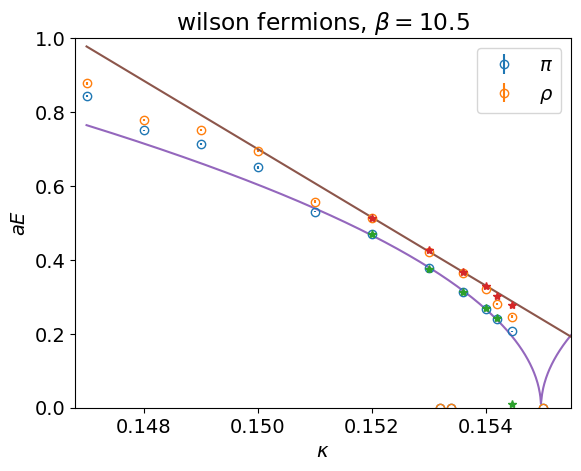

In [3]:
beta="beta10p5"
efm_trajectory(db, beta, "wilson", "efm_G5[t=20]", "efm_G1[t=20]")

plt.ylim(0.0,1.0)
plt.xlim(0.1468,0.1555)


beta="beta10p5"
kappas=["k0p1520","k0p1530","k0p1536","k0p1540","k0p1542","k0p15446"]

xvals=[]
pionvals=[]
rhovals=[]
pionerrs=[]
rhoerrs=[]
pirhovals=[]
pirhoerrs=[]
data=db.filter(beta).filter("wilson").data
for key, value in data.items():
    for k in kappas:
        if k in key:
            ePI = gv.gvar(value['e0_G5']['avg'], value['e0_G5']['err'])
            eRHO1 = gv.gvar(value['e0_G1']['avg'], value['e0_G1']['err'])
            print("k={}, pi={} rho={} pi/rho={}".format(k,ePI,eRHO1,ePI/eRHO1))
            xvals.append(float(k[1:].replace("p",".")))
            pionvals.append(ePI.mean)
            pionerrs.append(ePI.sdev)
            rhovals.append(eRHO1.mean)
            rhoerrs.append(eRHO1.sdev)
            pirhovals.append((ePI/eRHO1).mean)
            pirhoerrs.append((ePI/eRHO1).sdev)

plt.errorbar(xvals,pionvals,pionerrs,linestyle="None",marker='*',label='fit')
plt.errorbar(xvals,rhovals,rhoerrs,linestyle="None",marker='*',label='fit')

print(pionvals)

fitKappas=np.array([float(k.replace("p",".").replace("k","")) for k in kappas])

reorder=[0,1,3,2,4,5]
fitPionVals=np.array([pionvals[i] for i in reorder])
fitPionErrs=np.diagflat([pionerrs[i]**2 for i in reorder])
fitY=gv.gvar(fitPionVals,fitPionErrs)
fit = lsqfit.nonlinear_fit(data=(fitKappas[0:5],fitY[0:5]), 
                     fcn=mpi_traj, p0={'coef': 1, 'kc': 0.170})



#print(fit.p)
print("pion chi2=",fit.chi2)

fitRhoVals=np.array([rhovals[i] for i in reorder])
fitRhoErrs=np.diagflat([rhoerrs[i]**2 for i in reorder])

fitY=gv.gvar(fitRhoVals,fitRhoErrs)

fit2=lsqfit.nonlinear_fit(data=(fitKappas[0:5],fitY[0:5]), 
                     fcn=mrho_traj, p0={'coef': 1, 'kc': 0.1550})

print("rho chi2=",fit2.chi2)

chiralKappas=[k for k in np.arange(0.147,0.16,0.00001)]
plt.plot(chiralKappas, [fit.p['coef'].mean*np.sqrt(np.abs(fit.p['kc'].mean-k)) for k in chiralKappas])
plt.plot(chiralKappas, [fit2.p['coef'].mean*np.abs(k-fit2.p['kc'].mean) for k in chiralKappas])

#plt.show()
plt.savefig("mass_trajectory_{}.png".format(beta), facecolor='white', transparent=False, dpi=1200)

In [5]:
pirhovals

[0.9150421482893956,
 0.8845511481735597,
 0.8169237174107125,
 0.8522704356424662,
 0.8056133976733088,
 0.03815023503732135]

In [6]:
xvals

[0.152, 0.153, 0.154, 0.1536, 0.1542, 0.15446]

In [7]:
pirhovals[-2]=0.812
pirhovals[-1]=0.784

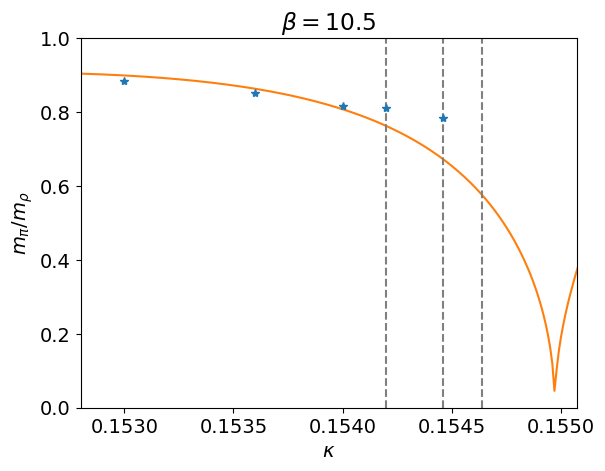

In [8]:
plt.errorbar(xvals,pirhovals,pirhoerrs,linestyle="None",marker='*',label='fit')
plt.plot(chiralKappas, [(fit.p['coef'].mean*np.sqrt(np.abs(fit.p['kc'].mean-k)))/(fit2.p['coef'].mean*np.abs(k-fit2.p['kc'].mean)) for k in chiralKappas])
plt.xlim(0.1528,fit.p['kc'].mean+0.0001)
plt.ylim(0,1)
plt.ylabel('$m_{\\pi}/m_{\\rho}$')
plt.xlabel('$\\kappa$')
ax=plt.gca()
#for ratio in [0.75,0.65,0.55]:
#    ax.axhline(ratio, color='gray', linestyle='--')
for kappa in [0.1542,0.15446,0.15464]:
    ax.axvline(kappa, color='gray', linestyle='--')    
plt.title(r'$\beta={}$'.format(beta[4:].replace('p','.')))
plt.savefig("mpimrho_{}.png".format(beta),facecolor='white', transparent=False, dpi=1200)

[0.153, 0.154, 0.1542, 0.15446]
[0.2831024441057119, 0.28372215255609773, 0.28384895544756483, 0.2839932374085783]
[3.5881074365418113e-06, 4.671757728490995e-06, 4.429473285782869e-06, 3.566271988147019e-06]


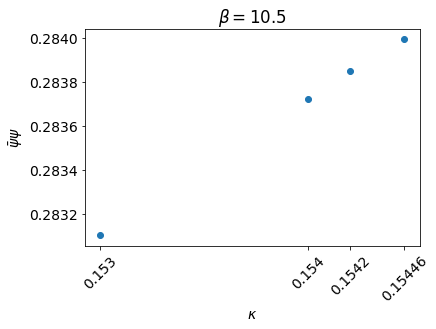

In [ ]:
beta="beta10p5"
kappas=["k0p1520","k0p1530","k0p1536","k0p1540","k0p1542","k0p15446"]

pbpvals=[]
pbperrs=[]
pbpkappas=[]


data=db.filter(beta).filter("wilson").data

for key, value in data.items():
    for k in kappas:
        if k in key:
            if 'pbp' in value:
                pbp = gv.gvar(value['pbp']['avg'], value['pbp']['err'])
                pbpvals.append(pbp.mean)
                pbperrs.append(pbp.sdev)
                pbpkappas.append(float(k[1:].replace("p",".")))

print(pbpkappas)
print(pbpvals)
print(pbperrs)

plt.errorbar(pbpkappas, pbpvals, pbperrs, linestyle="None", marker="o")
ax=plt.gca() 
ax.set_xticks(pbpkappas)
ax.set_xticklabels(pbpkappas, rotation=45)
plt.ylabel(r'$\bar{\psi}\psi$')
plt.xlabel(r'$\kappa$')
plt.title(r'$\beta=10.5$')
plt.savefig("pbp_{}.png".format(beta),facecolor='white', transparent=False, dpi=1200)


k=k0p1495, pi=0.32715(52) rho=0.37118(70) pi/rho=0.8814(22)
k=k0p1500, pi=0.28404(39) rho=0.32612(73) pi/rho=0.8710(23)
k=k0p1510, pi=0.18964(89) rho=0.2407(17) pi/rho=0.7880(66)
k=k0p1504, pi=0.23538(85) rho=0.2784(14) pi/rho=0.8454(51)
[0.1495 0.15   0.1504] [0.32715(52) 0.28404(39) 0.23538(85)]
{'coef': 7.518(38), 'kc': 0.151411(15)}
[0.1495 0.15   0.1504] [0.37118(70) 0.32612(73) 0.2784(14)]


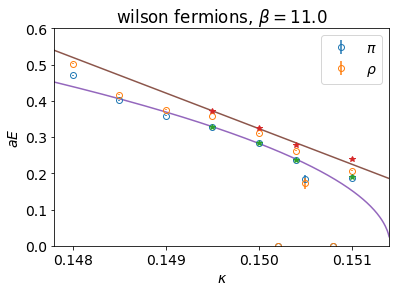

In [11]:
beta="beta11p0"
efm_trajectory(db, beta, "wilson", "efm_G5[t=20]", "efm_G1[t=20]")

plt.ylim(0.0,0.6)
plt.xlim(0.1478,0.1514)

beta="beta11p0"
kappas=["k0p1495","k0p1500","k0p1504","k0p1510"]

xvals=[]
pionvals=[]
rhovals=[]
pionerrs=[]
rhoerrs=[]
pirhovals=[]
pirhoerrs=[]
data=db.filter(beta).filter("wilson").data
for key, value in data.items():
    for k in kappas:
        if k in key:
            ePI = gv.gvar(value['e0_G5']['avg'], value['e0_G5']['err'])
            eRHO1 = gv.gvar(value['e0_G1']['avg'], value['e0_G1']['err'])
            print("k={}, pi={} rho={} pi/rho={}".format(k,ePI,eRHO1,ePI/eRHO1))
            xvals.append(float(k[1:].replace("p",".")))
            pionvals.append(ePI.mean)
            pionerrs.append(ePI.sdev)
            rhovals.append(eRHO1.mean)
            rhoerrs.append(eRHO1.sdev)
            pirhovals.append((ePI/eRHO1).mean)
            pirhoerrs.append((ePI/eRHO1).sdev)  

plt.errorbar(xvals,pionvals,pionerrs,linestyle="None",marker='*',label='fit')
plt.errorbar(xvals,rhovals,rhoerrs,linestyle="None",marker='*',label='fit')

fitKappas=np.array([float(k.replace("p",".").replace("k","")) for k in kappas])
reorder=[0,1,3,2]
fitPionVals=np.array([pionvals[i] for i in reorder])
fitPionErrs=np.diagflat([pionerrs[i]**2 for i in reorder])
fitY=gv.gvar(fitPionVals,fitPionErrs)
print(fitKappas[0:3],fitY[0:3])
fit=lsqfit.nonlinear_fit(data=(fitKappas[0:3],fitY[0:3]), 
                     fcn=mpi_traj, p0={'coef': 1, 'kc': 0.1550})
print(fit.p)

fitRhoVals=np.array([rhovals[i] for i in reorder])
fitRhoErrs=np.diagflat([rhoerrs[i]**2 for i in reorder])
fitY=gv.gvar(fitRhoVals,fitRhoErrs)
print(fitKappas[0:3],fitY[0:3])
fit2=lsqfit.nonlinear_fit(data=(fitKappas[0:3],fitY[0:3]), 
                     fcn=mrho_traj, p0={'coef': 1, 'kc': 0.1550})

chiralKappas=[k for k in np.arange(0.147,0.16,0.00001)]
plt.plot(chiralKappas, [fit.p['coef'].mean*np.sqrt(np.abs(k-fit.p['kc'].mean)) for k in chiralKappas])
plt.plot(chiralKappas, [fit2.p['coef'].mean*np.abs(k-fit2.p['kc'].mean) for k in chiralKappas])


#plt.show()
plt.savefig("mass_trajectory_{}.png".format(beta), facecolor='white', transparent=False, dpi=1200)
# 0.1495 & 0.1500 are high stats & good fits

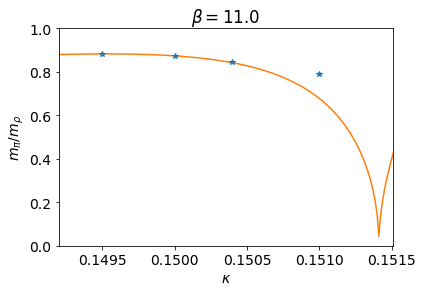

In [12]:
plt.errorbar(xvals,pirhovals,pirhoerrs,linestyle="None",marker='*',label='fit')
plt.plot(chiralKappas, [(fit.p['coef'].mean*np.sqrt(np.abs(fit.p['kc'].mean-k)))/(fit2.p['coef'].mean*np.abs(k-fit2.p['kc'].mean)) for k in chiralKappas])
plt.xlim(0.1492,fit.p['kc'].mean+0.0001)
plt.ylim(0,1)
plt.ylabel('$m_{\\pi}/m_{\\rho}$')
plt.xlabel('$\\kappa$')
ax=plt.gca()
#for ratio in [0.77,0.75,0.65,0.55]:
#    ax.axhline(ratio, color='gray', linestyle='--')
#for kappa in [0.1541,0.1542,0.15446,0.15464]:
#    ax.axvline(kappa, color='gray', linestyle='--')    
plt.title(r'$\beta={}$'.format(beta[4:].replace('p','.')))
plt.savefig("mpimrho_{}.png".format(beta),facecolor='white', transparent=False, dpi=1200)

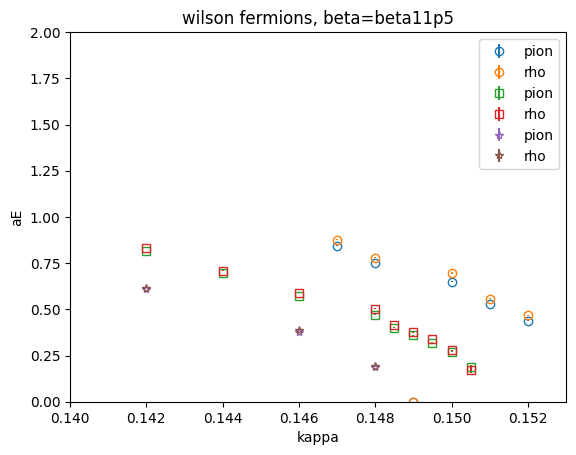

In [8]:
efm_trajectory(db, "beta10p5", "wilson", "efm_G5[t=20]", "efm_G1[t=20]")
efm_trajectory(db, "beta11p0", "wilson", "efm_G5[t=20]", "efm_G1[t=20]", marker='s')
efm_trajectory(db, "beta11p5", "wilson", "efm_G5[t=20]", "efm_G1[t=20]", marker='*')


plt.ylim(0.0,2.0)
plt.xlim(0.14,0.153)

#plt.show()
plt.savefig("mass_trajectory_{}.svg".format("multiple_beta"))

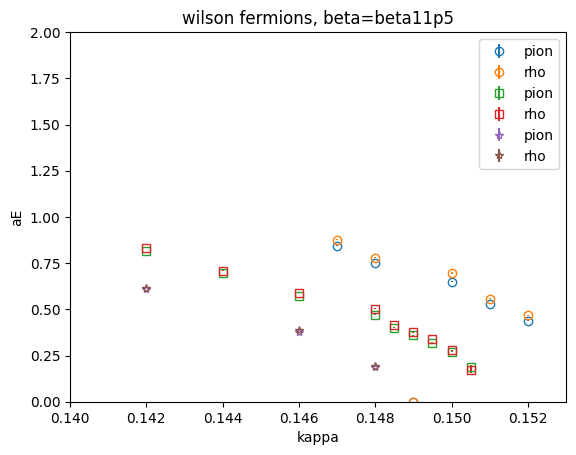

In [9]:
efm_trajectory(db, "beta10p5", "wilson", "efm_G5[t=20]", "efm_G1[t=20]")
efm_trajectory(db, "beta11p0", "wilson", "efm_G5[t=20]", "efm_G1[t=20]", marker='s')
efm_trajectory(db, "beta11p5", "wilson", "efm_G5[t=20]", "efm_G1[t=20]", marker='*')


plt.ylim(0.0,2.0)
plt.xlim(0.14,0.153)

#plt.show()
plt.savefig("mass_trajectory_{}.svg".format("multiple_beta"))

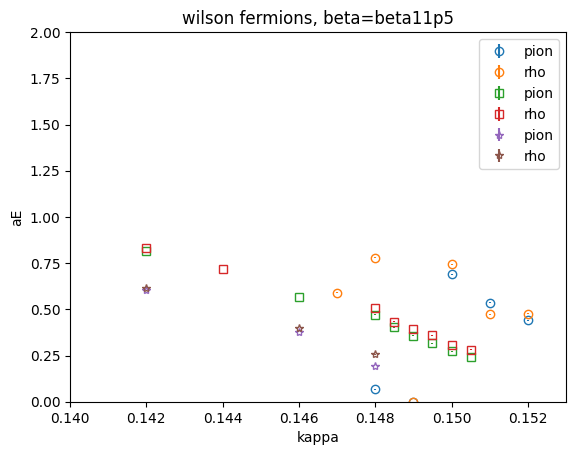

In [14]:
efm_trajectory(db, "beta10p5", "wilson", "e0_G5", "e0_G1")
efm_trajectory(db, "beta11p0", "wilson", "e0_G5", "e0_G1", marker='s')
efm_trajectory(db, "beta11p5", "wilson", "e0_G5", "e0_G1", marker='*')


plt.ylim(0.0,2.0)
plt.xlim(0.14,0.153)

#plt.show()
plt.savefig("mass_trajectory_{}.svg".format("multiple_beta"))

In [17]:
betas=[]
vals=[]
for k,v in db.filter("k0p1480").data.items():
    strTerms=k.split('/')
    beta=float(strTerms[7][4:].replace('p','.'))
    #print(beta,v['fullPlaq'])
    betas.append(beta)
    vals.append(v['fullPlaq']['avg'])#err for err

10.5 {'avg': 0.568516520763819, 'err': 3.3181612327433576e-05}
10.0 {'avg': 0.4652327029781625, 'err': 0.000466832224758576}
11.0 {'avg': 0.5969970596732631, 'err': 0.0005693511369751793}
11.5 {'avg': 0.6244340613284064, 'err': 1.0367754915861715e-05}
12.0 {'avg': 0.6454665990871002, 'err': 1.165080377211313e-05}


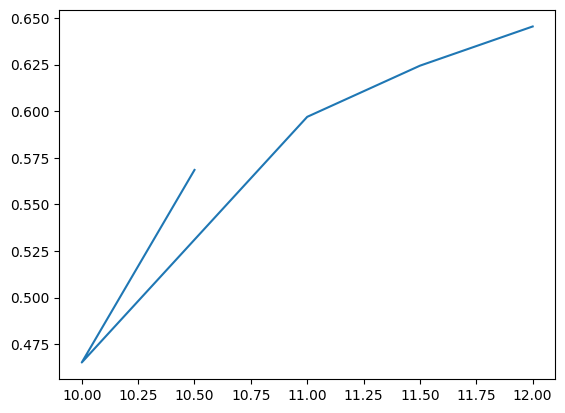

In [18]:
plt.plot(betas,vals)

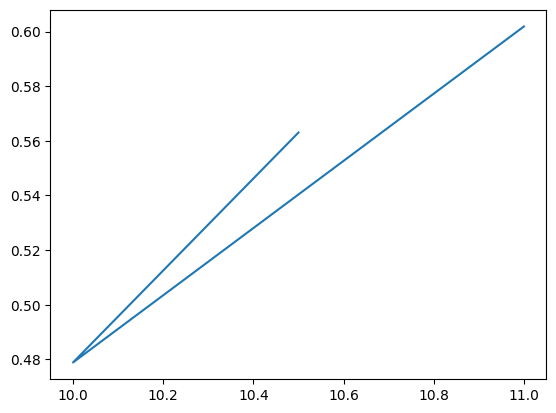

In [19]:
betas=[]
vals=[]
for k,v in db.filter("k0p1500").data.items():
    strTerms=k.split('/')
    beta=float(strTerms[7][4:].replace('p','.'))
    #print(beta,v['fullPlaq'])
    betas.append(beta)
    vals.append(v['fullPlaq']['avg'])#err for err
plt.plot(betas,vals)